# Ideal Robot Model

### ノイズを考慮しない場合のロボットのモデル

Ideal Robotクラスを追加（アニメーションの追加）

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as anm  #アニメーション描画モジュール
matplotlib.use('nbagg')              #jupyter 上でアニメーションを再生する機能
import math
import matplotlib.patches as patches  #図形の描画モジュール
import numpy as np

In [2]:
class World:
    def __init__(self, debug = False):   #デバッグ用のフラグを追加
        self.objects = []   #ここに、世界の中にあるrobotや障害物を登録
        self.debug = debug
        
    def append(self, obj):
        self.objects.append(obj)
        
    def draw(self):
        fig = plt.figure(figsize = (3,3)) #8*8 inchの図を用意
        ax = fig.add_subplot(111)         #サブプロットを準備
        ax.set_aspect('equal')            #縦横比を設定（ここでは１：１）
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        
        elems = []
        
        if self.debug:
            for i in range(1000):
                self.one_step(i, elems, ax)
        else:
            self.ani = anm.FuncAnimation(fig, self.one_step, fargs = (elems, ax), frames = 10, interval = 1000, repeat = False )
            #FuncAnimation:図、コールバック関数、コールバック関数の引数（２つ目以降の引数）、コールバック関数を呼び出す回数、アニメが切り替わる間隔（ミリ秒）
            plt.show()
            
        for obj in self.objects:
            obj.draw(ax)                #登録した物体のもつdraw関数を呼び出す
        plt.show()                      #描画
        
    def one_step(self, i, elems, ax):
        pass
        
        

In [3]:
class IdealRobot:
    def __init__(self, pose, color = "black"):
        self.pose = pose  #姿勢の初期値（numpyの3次元配列）
        self.r = 0.2     #半径
        self.color = color
        
    def draw(self, ax):
        x, y, theta = self.pose
        x_n = x + self.r * math.cos(theta)
        y_n = y + self.r * math.sin(theta)  #それぞれの鼻先の座標
        
        ax.plot([x, x_n], [y, y_n], color=self.color)     #線の描画
        c = patches.Circle(xy = (x, y), radius = self.r, fill=False, color = self.color)   #円の描画
        ax.add_patch(c)    #patch（ここでは円）をsubplotに追加

<IPython.core.display.Javascript object>


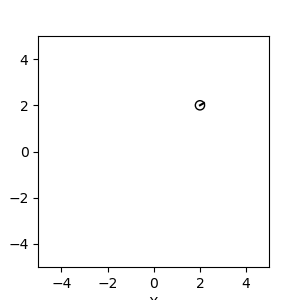

In [4]:
world = World()

robot1 = IdealRobot(np.array([2,2, math.pi/6]).T)
world.append(robot1)
world.draw()